# HW 13 - Introduction to SciPy
ULAB - Physics and Astronomy Division
Due **Sunday, February 16th, 2025 at 11:59 PM** on Gradescope.

------

## 0 Academic Integrity

Please type the following message in the cell below as a comment. Sign with your name.

------

**I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.**

------


I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material. Will Sperling

## 1 Simulate a Pendulum
A simple pendulum follows the equation:

$$
\frac{\text{d}^2\theta}{\text{d}t^2} + \frac{g}{L}\sin(\theta) = 0
$$

The goal is to **numerically solve the equation** and compare it to the small-angle approximation.

***Small-Angle Approximation:** a mathematical simplification used in physics when dealing with osciallatory motion, particularly for pendulums and trigonometric funcitons in general.*

Import `numpy`, `matplotlib` and `solve_ivp` in the cell below.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Define the acceleration of gravity $g$ (two significant digits is fine) and the length of the pendulum $l$ in the cell below to **1 meter**.

In [18]:
g = 9.81
L = 1.0 #meters

Write a **function** called `pendulum` that contain the arguments `t` and `y`. Write out the differential equation. Follow the structure Brianna gave in lecture, it's very similar.

*Hint: The variable domega/dt should be equal to -(g / L) * np.sin(theta)*. I'll let you take care of the rest. 

In [20]:
def pendulum(t, y):
    theta, omega = y #y[0] = theta, y[1] = omega
    dtheta_dt = omega
    domega_dt = -(g/L)*np.sin(theta)
    return [dtheta_dt, domega_dt]

Give you equation some initial conditions. Run the cell below.

In [22]:
theta_0 = np.radians(10) # Convert 10 degrees to radians
omega_0 = 0.0 # Initial angular velocity

Solve the differential equation using `solve_ivp`. Set the simulation time to **10 seconds** and the time for evaluation to **10 steps**.

In [24]:
t_span = (0, 10) #10 second simulation
t_eval = np.linspace(0, 10, 500) #time steps for evaluation
sol = solve_ivp(pendulum, t_span, [theta_0, omega_0], t_eval=t_eval)

Extrac the **theta** values (`sol.y`) and the **time** values (`sol.t`).

In [26]:
theta_values = sol.y[0]
time_values = sol.t

Calculate the theoretical period (aka small-angle approximation).

*Hint: Use `2 * np.pi * np.sqrt(L / g)`.*

In [28]:
def theoretical_period(L):
    period = 2 * np.pi * np.sqrt(L / g)
    return period

Print out the theoretical period (small-angle approximation) to **two** significant digits.

In [30]:
T = np.round(theoretical_period(L), 1)
print(f"Theoretical Period: {T} seconds")

Theoretical Period: 2.0 seconds


Estimate the period from simulation by finding the first zero crossing. Run the cell below.

In [32]:
zero_crossings = np.where(np.diff(np.sign(theta_values)))[0]
if len(zero_crossings) >= 2:
    T_numerical = 2 * (time_values[zero_crossings[1]] - time_values[zero_crossings[0]])
else:
    T_numerical = None

In [33]:
print(zero_crossings)

[ 25  75 125 175 225 275 325 375 426 476]


Plot the results in the cell below. Add a **horizontal** line at `x=0`, give it an `x_label` of **Time (s)**, a `y_label` of **Theta (radians)** and a title.

Text(0.5, 1.0, 'Pendulum Motion')

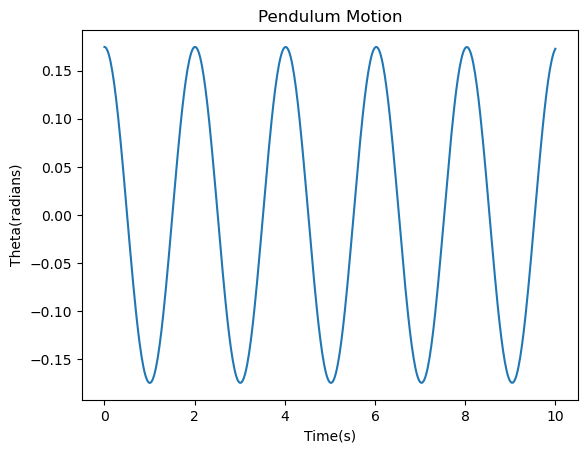

In [35]:
plt.plot(time_values, theta_values, label = "Numerical Solution")
plt.xlabel("Time(s)")
plt.ylabel("Theta(radians)")
plt.title("Pendulum Motion")

Print out the numerical period (what you calculated with scipy) to **four** significant digits.

In [37]:
print(np.round(T_numerical, 4))

2.004


Compare the results between the small-angle approximation and numerical calculation. How well does the approximation match the numerical result?

The small-angle and numerical calculations match each other very well and display similar results..

## 2 Using Curve_Fit with Covid-19 Data
Import `pandas` in the cell below.

In [41]:
import pandas as pd

Run the cell below. If that doesn't work, then just **paste** the link into a web browser and it should automatically download. Then you can put the `.csv` file in the same directory as this notebook.

With the `pandas` function `read_csv`, import the data in the cell below as a dataframe `df`.

In [44]:
df = pd.read_csv("OWID COVID Data.csv")

Select **United States** as the country and make a new data frame called `df_country` with only this information.

In [111]:
df_country = df[df["location"] == "United States"]

From your `df_country` dataframe, extract only the relevant columns: **"date"** and **"total_cases"**. 

*Hint: Use `.dropna()` to get rid of the other data.*

In [113]:
df_country = df_country[["date", "total_cases"]].dropna()

In your `df_country` dataframe, add a new column called **"days since start"** and covert the data to numerical days.

*Hint: You can just take the length of your dataframe (`range(len(df_country))`).*

In [115]:
df_country["days since start"] = range(len(df_country))

Print the first few rows of your `df_country` dataframe.

In [117]:
df_country.head()

,date,total_cases,days since start
403451,2020-01-05,0.0,0
403452,2020-01-06,0.0,1
403453,2020-01-07,0.0,2
403454,2020-01-08,0.0,3
403455,2020-01-09,0.0,4


In the cell below, import `curve_fit`. Make sure to have `numpy` imported in this notebook as well.

In [119]:
from scipy.optimize import curve_fit
import numpy as np

### Some background:
At the beginning of an outbreak, the number of cases follows an exponential growth model:

$$
C(t) = C_0 e^{rt}
$$

where
* $C(t)$ = number of cases at time $t$.
* $C_0$ = initial number of cases.
* $r$ = growth rate.
* $t$ = time in days.

Write a **function** called `exponential_growth` that takes in arguments `t`, `C_0` and `r`. Return the function given above.

In [121]:
def exponential_growth(t, C_0, r):
    return C_0 * np.exp(r * t)

Make a new variable called `days` and another new variable called `cases`. To the `days` variable give it the first 30 rows (your column **"days_since_start"**) and to the `cases` variable give it the first 30 rows (your column **"total_cases"**).

In [123]:
days = df_country["days since start"].iloc[:30].values
cases = df_country["total_cases"].iloc[:30].values

With `curve_fit` fit the model. Give it the argument `p0 = [1, 0.1]`.

In [125]:
popt, pcov = curve_fit(exponential_growth, days, cases, p0=[1, 0.1])

Extract the best-fit parameters from `popt`. Call them `C0_fit` and `r_fit`.

In [128]:
C_0_fit, r_fit = popt

Print your variables `C0_fit` with **two** significant digits. Print your variables `r_fit` with **four** significant digits.

In [130]:
print(np.round(C_0_fit, 2))

0.12


In [134]:
print(np.round(r_fit, 4))

0.1538


Make sure to have `matplotlib` imported. Make a variable called `future_days` give it a numpy range from `0` to `60`. We want to predict up to 60 days.

In [136]:
import matplotlib.pyplot as plt

In [138]:
future_days = np.arange(0, 60)

Make a variable called `predicted_cases` set it equal to your function `exponential_growth` with inputs being `future_days` and your `curve_fit` outputs. 

*Hint: You will want to use `*popt` as your `curve_fit` input.*

In [140]:
predicted_cases = exponential_growth(future_days, *popt)

**Scatter** the variable `cases` as a function of `days`. **Plot** the variable `future_days` as a function of `predicted_cases`. 

Don't forget a label for your x-axis, y-axis, title and legend.

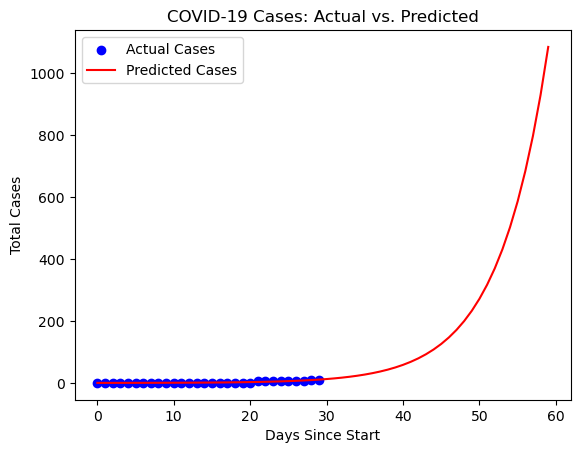

In [143]:
plt.scatter(days, cases, color='blue', label='Actual Cases')

plt.plot(future_days, predicted_cases, color='red', label='Predicted Cases')


plt.xlabel('Days Since Start')
plt.ylabel('Total Cases')
plt.title('COVID-19 Cases: Actual vs. Predicted for 60 Days')

plt.legend()


How well does your exponential model fit the actual COVID-19 data? 

It fits pretty well.

Make another plot but this time to **90 days**.

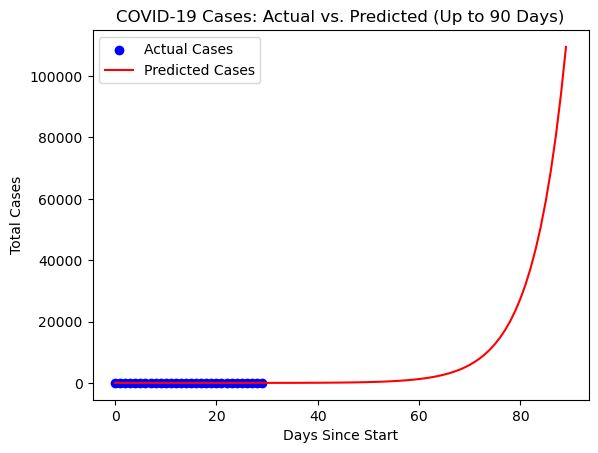

In [155]:
future_days_90 = np.arange(0, 90)

predicted_cases_90 = exponential_growth(future_days_90, *popt)

plt.scatter(days, cases, color='blue', label='Actual Cases')

plt.plot(future_days_90, predicted_cases_90, color='red', label='Predicted Cases')


plt.xlabel('Days Since Start')
plt.ylabel('Total Cases')
plt.title('COVID-19 Cases: Actual vs. Predicted (Up to 90 Days)')


plt.legend()


plt.show()


What does your model predict the number of cases to be at 87 days? Print in the cell below.

In [159]:
print(exponential_growth(87, *popt))

80497.10645252101


## 3 Seaborn
Use Seaborn to visualize your data, NOT matplotlib. 
1) Go to this website and **pick a dataset that interest you**: https://github.com/mwaskom/seaborn-data
2) Go to this website for documentation: https://seaborn.pydata.org/index.html
3) Import seaborn data (*Hint: You can use the function `sns.load dataset()`. For example, `sns.load dataset('planets')`.*
4) Make a cool plot!
5) With `scipy` add a model to your data. (This can be a different plot.)

In [186]:
import seaborn as sns

In [188]:
exercise = sns.load_dataset('exercise')

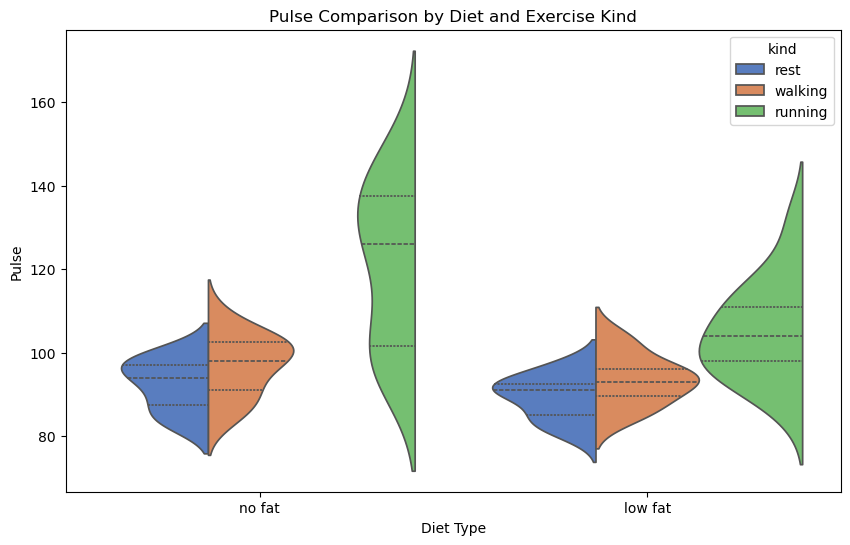

In [190]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=exercise, x='diet', y='pulse', hue='kind', split=True, inner='quart', palette='muted')

plt.xlabel('Diet Type')
plt.ylabel('Pulse')
plt.title('Pulse Comparison by Diet and Exercise Kind')

plt.show()

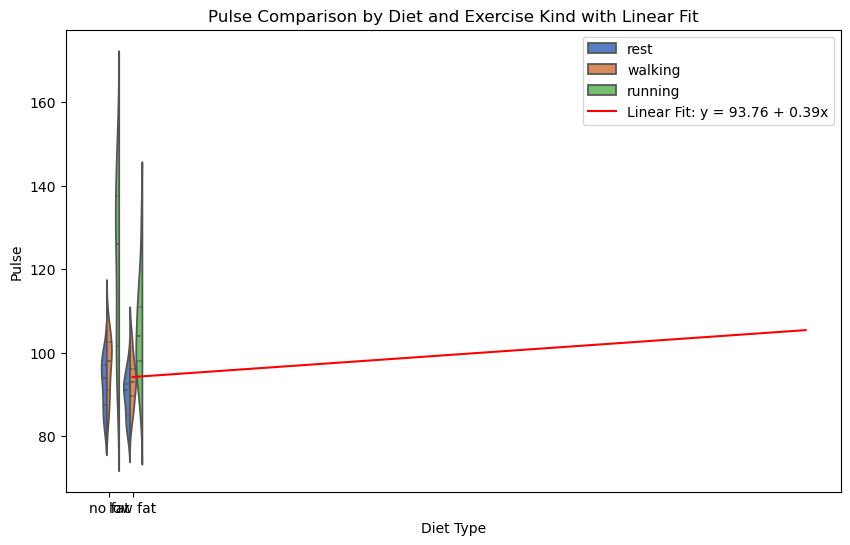

In [192]:
from scipy import stats
#adding a linear regression line of predicted pulse

exercise['time'] = exercise['time'].str.replace(' min', '').astype(float)

time = exercise['time']
pulse = exercise['pulse']

slope, intercept, _, _, _ = stats.linregress(time, pulse)

predicted_pulse = intercept + slope * time

plt.figure(figsize=(10, 6))
sns.violinplot(data=exercise, x='diet', y='pulse', hue='kind', split=True, inner='quart', palette='muted')

sorted_time = np.sort(time)
predicted_pulse_sorted = intercept + slope * sorted_time

plt.plot(sorted_time, predicted_pulse_sorted, color='red', label=f'Linear Fit: y = {intercept:.2f} + {slope:.2f}x')

plt.xlabel('Diet Type')
plt.ylabel('Pulse')
plt.title('Pulse Comparison by Diet and Exercise Kind with Linear Fit')

plt.legend()


plt.show()

On it's own branch, submit this notebook to Gradescope! 